<a href="https://colab.research.google.com/github/Mparate1234/Py_stat_DS_ML/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ------------------------------------- Classification---------------------------------

# 6 aug                  - Logistic regression model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
x=df[['Age','EstimatedSalary']]
y=df['Purchased']

In [6]:
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [7]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x)
x_transform = ss.transform(x)

In [8]:
type(x_transform)

numpy.ndarray

In [9]:
pd.DataFrame(x_transform,columns=x.columns).describe()

,Age,EstimatedSalary
count,4.000000e+02,4.000000e+02
mean,-7.105427e-17,-1.776357e-17
std,1.001252e+00,1.001252e+00
min,-1.877311e+00,-1.607506e+00
25%,-7.550313e-01,-7.852897e-01
50%,-6.256110e-02,7.561451e-03
75%,7.970571e-01,5.361289e-01
max,2.134241e+00,2.356750e+00


In [10]:
set(y)        # gives unique elements

{0, 1}

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x_transform,y,random_state=2,test_size=0.2)       


## random_state=2 ensures that the data using for train and test is same all time, if it is not mention then data of train and 
#  test will keep on changing

#test_size=0.2      means- 'test data'=  20%     and    'train data' = 80%

In [12]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [13]:
y_pred=log.predict(x_test)
y_pred[:5]

array([0, 0, 0, 0, 1])

In [14]:
y_test[:5]

94     0
32     0
225    0
157    0
356    1
Name: Purchased, dtype: int64

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8125

In [16]:
y_proba=log.predict_proba(x_test)
y_proba[:5]

array([[0.93116359, 0.06883641],
       [0.99868527, 0.00131473],
       [0.87273621, 0.12726379],
       [0.94689362, 0.05310638],
       [0.09062931, 0.90937069]])

In [17]:
y_pred[:5]

array([0, 0, 0, 0, 1])

#            Decision tree

In [18]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

x=cancer.data
y=cancer.target

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [20]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

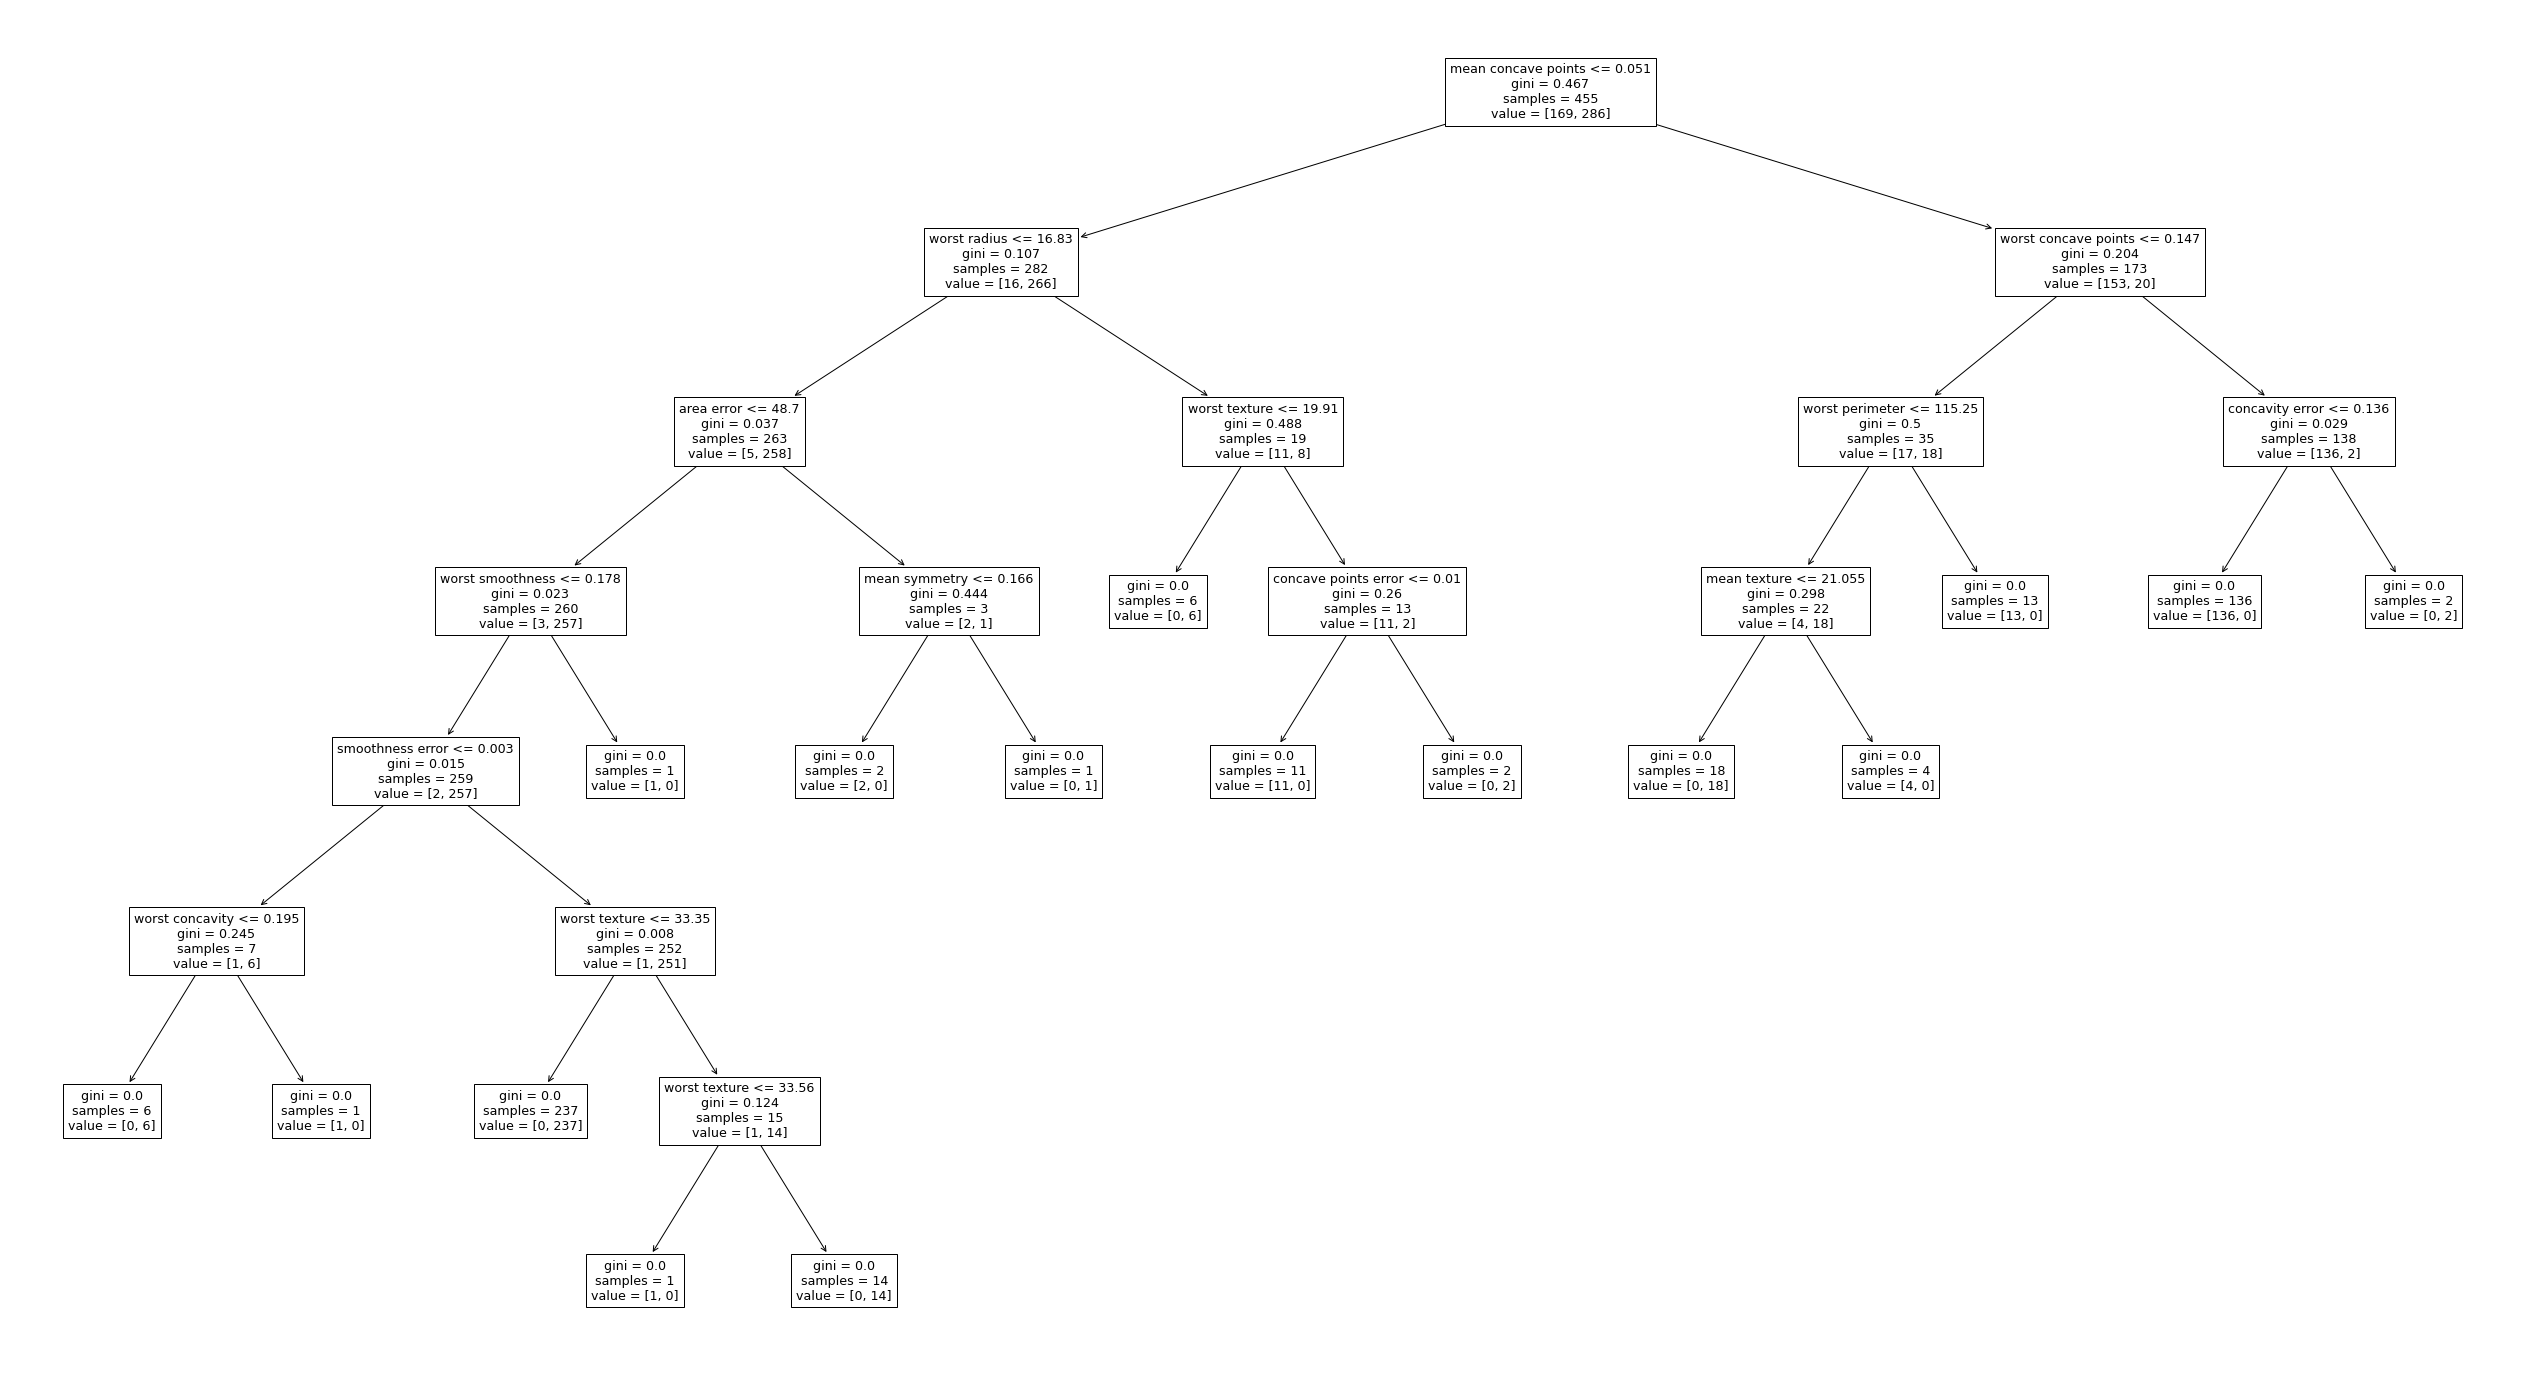

In [21]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(45,25))
plot_tree(tree,feature_names=cancer.feature_names)
plt.show()

In [22]:
tree.get_depth()

7

In [23]:
from sklearn.metrics import accuracy_score
y_pred=tree.predict(x_test)
accuracy_score(y_test,y_pred)

0.9473684210526315

In [24]:
y_pred[:5]

array([1, 0, 0, 1, 1])

In [25]:
y_test[:5]

array([1, 0, 0, 1, 1])

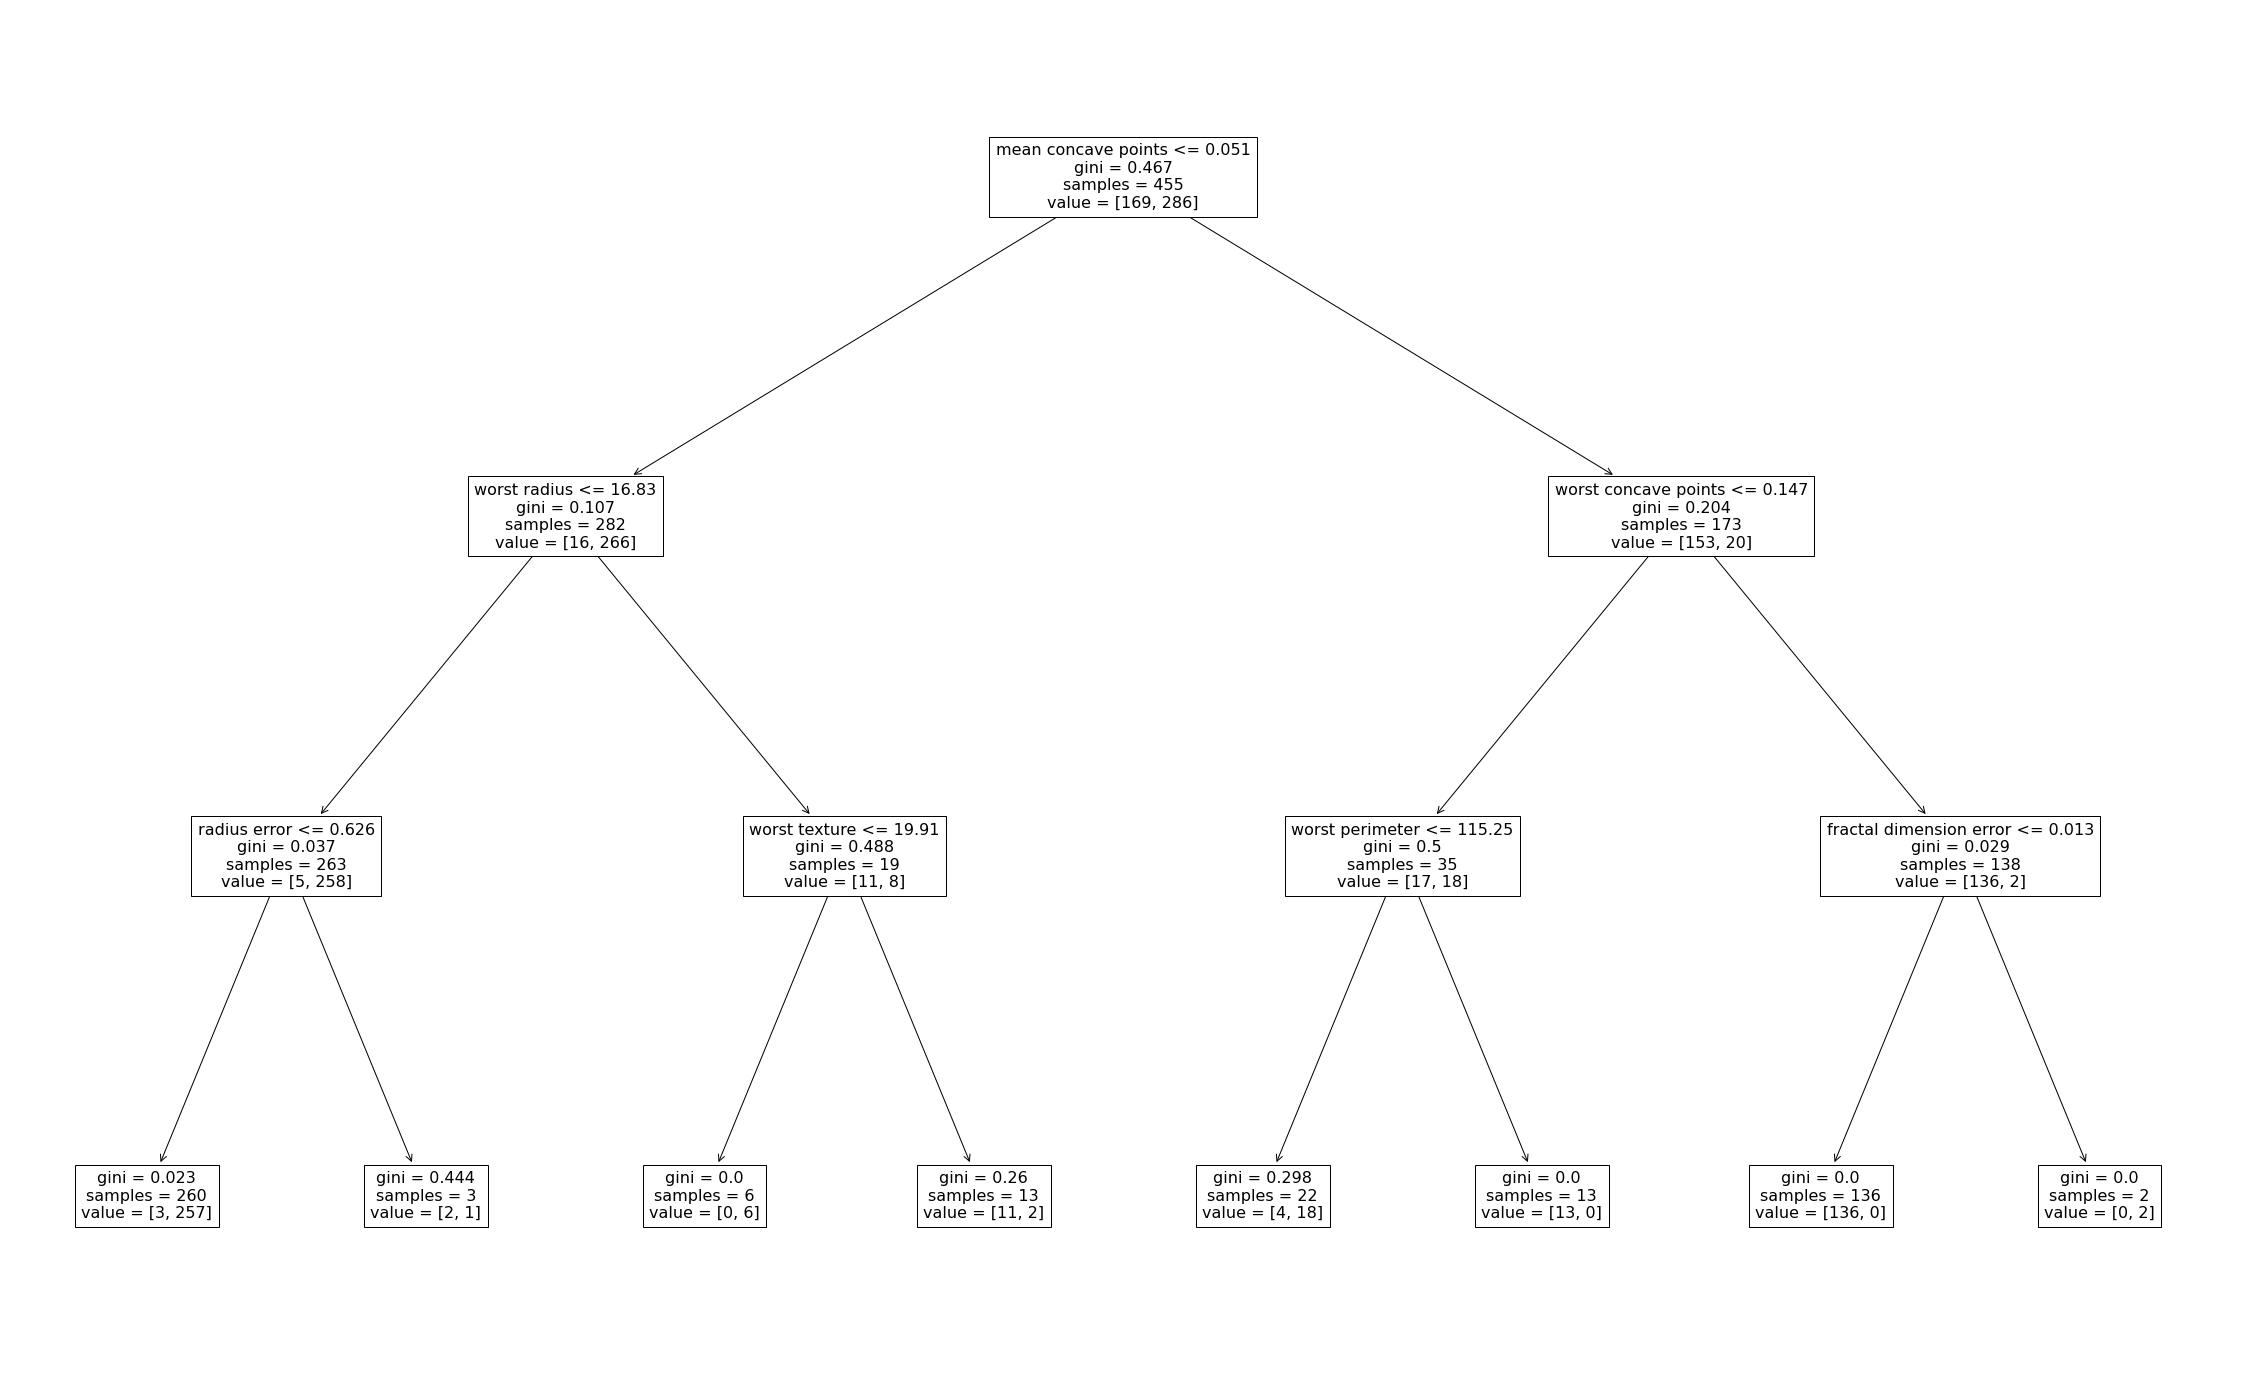

In [26]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=3)        ## hyper-paramer tuning -- changing given in "sklearn random forest parameters"
tree.fit(x_train,y_train)
plt.figure(figsize=(40,25))
plot_tree(tree,feature_names=cancer.feature_names)
plt.show()

In [27]:
from sklearn.metrics import accuracy_score
y_pred=tree.predict(x_test)
accuracy_score(y_test,y_pred)

0.9385964912280702

#           grid search cv                  ------------------     20 aug
### grid search cross validation 



In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
params={'criterion':['gini','entropy','log_loss'],
         'max_depth':range(2,15),
        'splitter':['best','random']}

In [30]:
dt=DecisionTreeClassifier()

In [31]:
grid=GridSearchCV(estimator=dt,
                 param_grid=params,
                 scoring='accuracy')

In [32]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 15),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [33]:
from sklearn import metrics
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [34]:
grid.best_score_

0.945054945054945

In [35]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'splitter': 'random'}

In [36]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=4, splitter='random')

#     Randon search cv

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
randomcv=RandomizedSearchCV(estimator=dt,
                           param_distributions=params,
                           n_iter=20)

In [39]:
randomcv.fit(x_train,y_train)
randomcv.best_score_

0.9384615384615385

In [40]:
randomcv.best_params_

{'splitter': 'best', 'max_depth': 10, 'criterion': 'log_loss'}

In [41]:
randomcv.best_estimator_

DecisionTreeClassifier(criterion='log_loss', max_depth=10)

#   Random forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [43]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [44]:
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9649122807017544

In [45]:
rf=RandomForestClassifier(n_estimators=500)
rf.fit(x_train,y_train)

y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9649122807017544

In [46]:
# feature importance
rf.feature_importances_

array([0.03162301, 0.01534758, 0.03816434, 0.04879147, 0.00713197,
       0.01203421, 0.06041498, 0.12140775, 0.00356999, 0.00426352,
       0.01316282, 0.00491095, 0.01584714, 0.03778226, 0.00467926,
       0.00442182, 0.00672793, 0.00441026, 0.00410372, 0.0062906 ,
       0.11442476, 0.01993745, 0.11954581, 0.09215479, 0.01288103,
       0.01536132, 0.02969637, 0.13226933, 0.01208335, 0.00656022])

In [47]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [48]:
df=pd.DataFrame()
df['columns']=cancer.feature_names
df['importance']=rf.feature_importances_
df.sort_values('importance',ascending=False)

,columns,importance
27,worst concave points,0.132269
7,mean concave points,0.121408
22,worst perimeter,0.119546
20,worst radius,0.114425
23,worst area,0.092155
6,mean concavity,0.060415
3,mean area,0.048791
2,mean perimeter,0.038164
13,area error,0.037782
0,mean radius,0.031623


# k nearest neighbors

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')

In [50]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [51]:
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.956140350877193

In [52]:
pd.DataFrame(x_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.117635,19.185033,91.882242,654.377582,0.095744,0.103619,0.088898,0.048280,0.181099,0.062757,...,16.235103,25.535692,107.103121,876.987033,0.131532,0.252742,0.274595,0.114182,0.290502,0.083868
std,3.535815,4.266005,24.322027,354.943187,0.013923,0.052470,0.079468,0.038060,0.027487,0.007210,...,4.811267,6.065108,33.374664,567.672841,0.023083,0.155014,0.209398,0.065326,0.063151,0.017848
min,7.691000,9.710000,47.920000,170.400000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,...,8.678000,12.020000,54.490000,223.600000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.705000,16.170000,75.100000,420.300000,0.085825,0.062890,0.029320,0.020340,0.161850,0.057645,...,13.055000,21.045000,84.255000,516.450000,0.114400,0.144950,0.116550,0.063930,0.249500,0.071050
50%,13.300000,18.680000,85.980000,551.700000,0.094620,0.090970,0.061540,0.033410,0.179200,0.061480,...,14.970000,25.220000,97.670000,686.600000,0.130900,0.210100,0.226400,0.098610,0.282700,0.080060
75%,15.740000,21.585000,103.750000,767.600000,0.104550,0.131300,0.132350,0.073895,0.195800,0.066100,...,18.410000,29.690000,124.650000,1031.500000,0.146050,0.341600,0.387200,0.161100,0.317750,0.092070
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.311400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.218400,0.937900,1.252000,0.291000,0.663800,0.173000


In [53]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train_transform=ss.fit_transform(x_train)

In [54]:
x_test_transform=ss.fit_transform(x_test)

In [55]:
knn.fit(x_train_transform,y_train)
y_pred=knn.predict(x_test_transform)
accuracy_score(y_test,y_pred)

0.956140350877193

In [56]:
# how to find best value of k
from sklearn.neighbors import KNeighborsClassifier

for neighbors in range(2,11):
    
    knn=KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(x_train_transform,y_train)
    y_pres=knn.predict(x_test_transform)
    print('Accuracy score is ',accuracy_score(y_test,y_pred),'for the value of k : ',neighbors)

Accuracy score is  0.956140350877193 for the value of k :  2
Accuracy score is  0.956140350877193 for the value of k :  3
Accuracy score is  0.956140350877193 for the value of k :  4
Accuracy score is  0.956140350877193 for the value of k :  5
Accuracy score is  0.956140350877193 for the value of k :  6
Accuracy score is  0.956140350877193 for the value of k :  7
Accuracy score is  0.956140350877193 for the value of k :  8
Accuracy score is  0.956140350877193 for the value of k :  9
Accuracy score is  0.956140350877193 for the value of k :  10


# support vector machine

In [57]:
from sklearn.svm import SVC
svc=SVC()

In [58]:
 # prefered that we scale the dataset

svc.fit(x_train_transform,y_train)
y_pred=svc.predict(x_test_transform)
accuracy_score(y_test,y_pred)

0.9824561403508771

# Naive Bayes Algorithm

In [59]:
x_train_transform

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
nb=GaussianNB()

In [62]:
nb.fit(x_train_transform,y_train)

GaussianNB()

In [63]:
y_pred=nb.predict(x_test_transform)
accuracy_score(y_test,y_pred)

0.956140350877193